In [ ]:
#Data import and preparation

import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import plotly.offline as py

from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)All changes saved
Files
..
Drop files to upload them to session storage
Disk
80.25 GB available

import plotly.graph_objs as go

import plotly.tools as tls
import seaborn as sns

import random

In [ ]:
# Import dataset
df = pd.read_csv("/content/data.csv")

df.drop({'Timestamp'}, axis=1, inplace=True)
df.head(2)

df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

colomn = df.columns
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE', 'MONTH'],
      dtype='object')

In [ ]:
# Convert categorical features into numerical
df['GENDER'] = df['GENDER'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['AGE'] = df['AGE'].map( {'20 or less': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3} ).astype(int)
dfcopy= df.copy()


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define which columns need to be normalized and encoded
numerical_cols = ["FRUITS_VEGGIES", "DAILY_STRESS", "PLACES_VISITED", "CORE_CIRCLE", "SUPPORTING_OTHERS",
                  "SOCIAL_NETWORK", "ACHIEVEMENT", "DONATION", "TODO_COMPLETED", "FLOW", "DAILY_STEPS",
                  "LIVE_VISION", "SLEEP_HOURS", "LOST_VACATION", "DAILY_SHOUTING", "SUFFICIENT_INCOME",
                  "PERSONAL_AWARDS", "TIME_FOR_PASSION", "WEEKLY_MEDITATION", "AGE"]

categorical_cols = ["BMI_RANGE"]

# Create transformers for preprocessing
numerical_transformer = MinMaxScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # drop='first' to avoid multicollinearity
])

# Use ColumnTransformer to apply transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

<Axes: title={'center': 'Pearson Correlation of Features'}>

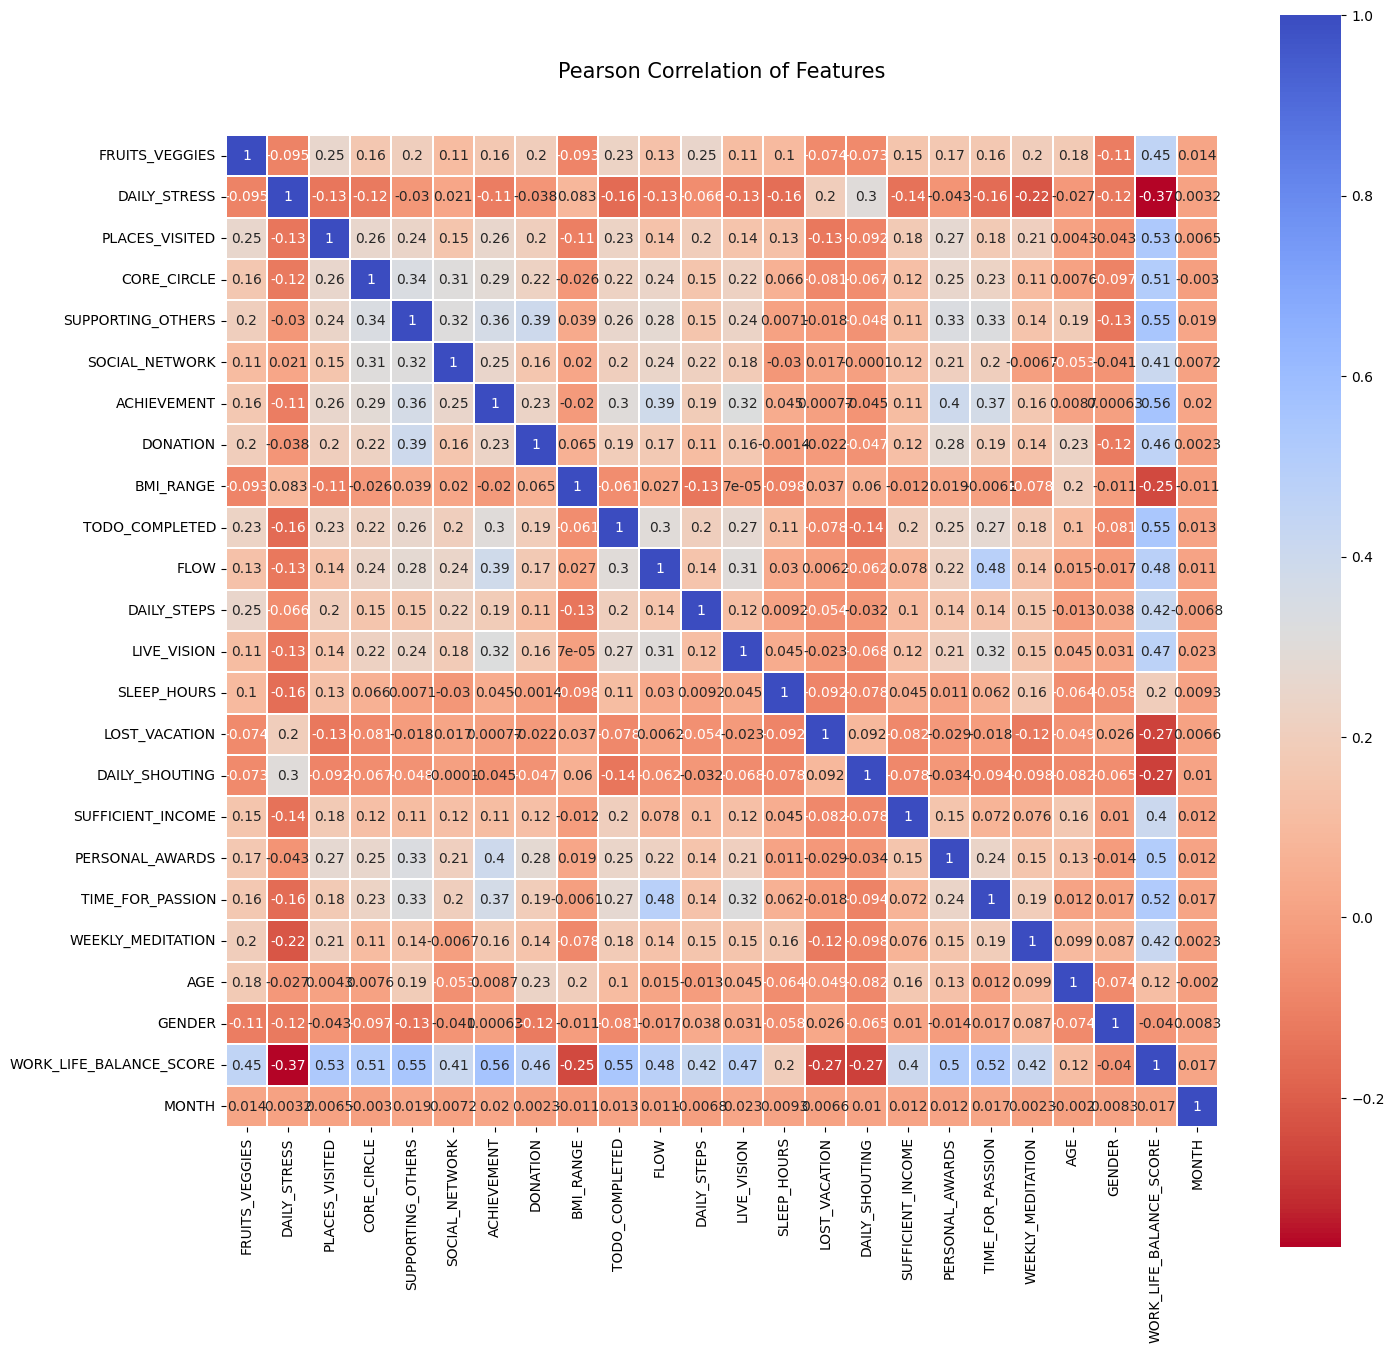

In [ ]:
#Pearson Correlation Heatmap

plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='coolwarm_r', linecolor='white', annot=True)
#astype(float)

In [ ]:
df.dtypes

FRUITS_VEGGIES               int64
DAILY_STRESS               float64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                          int64
GENDER                       int64
WORK_LIFE_BALANCE_SCORE    float64
MONTH                        int64
dtype: object

### **Feature Selection Using Random Forest**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
X = df.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df['WORK_LIFE_BALANCE_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Impute test data using the same imputer

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)  # Use the imputed training data


RandomForestRegressor(random_state=42)

In [ ]:
feature_importances = rf_model.feature_importances_

In [ ]:
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

SUPPORTING_OTHERS: 0.17577952054353166
TODO_COMPLETED: 0.15672095578691148
PLACES_VISITED: 0.13236782369403033
ACHIEVEMENT: 0.09089369044940371
SUFFICIENT_INCOME: 0.05907987065576178
WEEKLY_MEDITATION: 0.04269364771658859
TIME_FOR_PASSION: 0.039789247571747816
LIVE_VISION: 0.03513265502935647
CORE_CIRCLE: 0.03163336900035127
DAILY_STEPS: 0.029354513544622957
BMI_RANGE: 0.02604326679255583
PERSONAL_AWARDS: 0.02602367201892525
DAILY_STRESS: 0.023191841907463324
DONATION: 0.022753281866732006
FRUITS_VEGGIES: 0.02244824490436266
LOST_VACATION: 0.019040582530882415
SOCIAL_NETWORK: 0.01769469523652585
FLOW: 0.017424474418967658
DAILY_SHOUTING: 0.016235674709829995
MONTH: 0.005959042166976392
SLEEP_HOURS: 0.005607810463106211
AGE: 0.002857250441100495
GENDER: 0.001274868550265772


### **1. GRADIENT BOOSTING REGRESSOR**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer



# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train_imputed, y_train)

# Predict using the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 35.23226135544818
R-squared (R²): 0.9822653999174539


### **2. XGBOOST**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train_imputed, y_train)

# Predict using the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 60.592122294755185
R-squared (R²): 0.9695001962488552


### **3. LIGHTGBM**

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the LightGBM Regressor model
model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train_imputed, y_train)

# Predict using the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 12777, number of used features: 23
[LightGBM] [Info] Start training from score 666.626462
Mean Squared Error (MSE): 28.662785293870854
R-squared (R²): 0.985572227984166


### **4. CATBOOST**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.7 MB/s eta 0:00:00
0:	learn: 42.3511534	total: 49.8ms	remaining: 24.8s
1:	learn: 39.9211220	total: 52.9ms	remaining: 13.2s
2:	learn: 37.6062768	total: 55.9ms	remaining: 9.26s
3:	learn: 35.5590451	total: 59.2ms	remaining: 7.34s
4:	learn: 33.5140120	total: 62.2ms	remaining: 6.15s
5:	learn: 31.7137883	total: 65.5ms	remaining: 5.39s
6:	learn: 30.0034658	total: 69ms	remaining: 4.86s
7:	learn: 28.3747605	total: 72.1ms	remaining: 4.43s
8:	learn: 26.9275229	total: 75.1ms	remaining: 4.1s
9:	learn: 25.5114260	total: 78.2ms	remaining: 3.83s
10:	learn: 24.2352217	total: 81.6ms	remaining: 3.63s
11:	learn: 23.0206048	total: 84.7ms	remaining: 3.44s
12:	learn: 21.7955700	total: 88ms	remaining: 3.3s
13:	learn: 20.7573710	total: 91.1ms	remaining: 3.16s
14:	learn: 19.7221730	total: 94.2ms	remaining: 3.04s
15:	learn: 18.7534839	total: 97.5ms	remaining: 2.95s
16:	learn: 17.8303248	total: 100ms	remaining: 2.85s
17:	learn: 16.9850223	total: 104ms	r

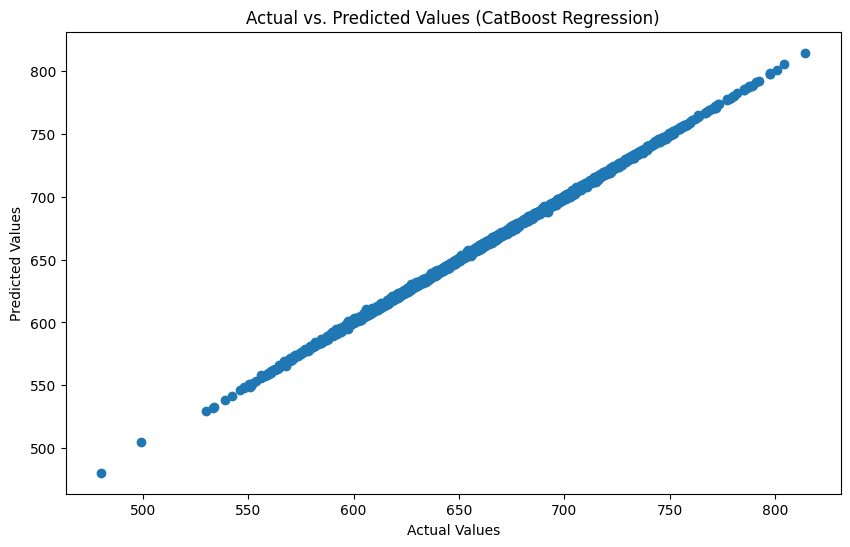

In [ ]:
!pip install catboost

import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor model
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (CatBoost Regression)')
plt.show()


### **5. SUPPORT VECTOR MACHINE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Support Vector Machine (SVM) Regressor model
model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', or 'poly'

# Fit the model to the training data
model.fit(X_train_imputed, y_train)

# Predict using the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.009954147827707734
R-squared (R²): 0.9999949894550024


### **6. K NEAREST NEIGHBOURS**

Mean Squared Error (MSE): 95.33423824726135
R-squared (R²): 0.95201231699458


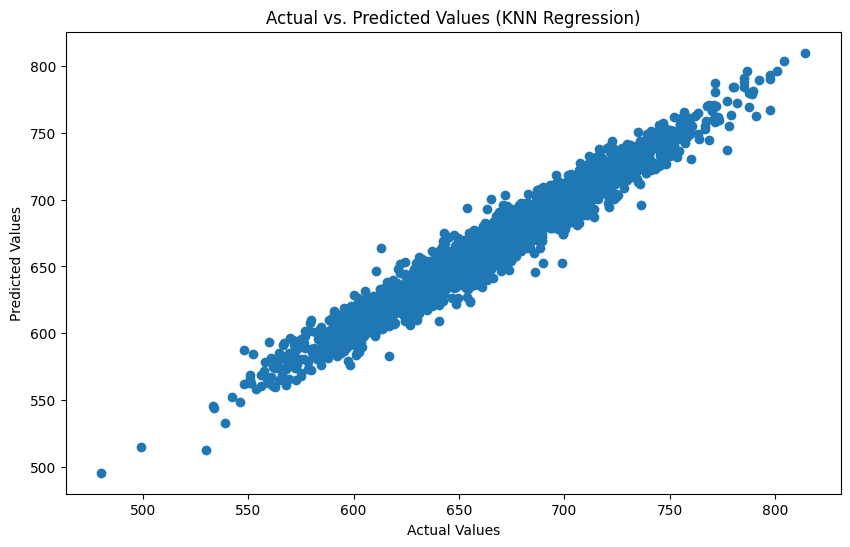

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import the imputer
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Min-Max scaler to scale features to the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Fit and transform the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize the K-Nearest Neighbors (KNN) Regressor model
k = 5  # You can adjust the number of neighbors (k)
model = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
model.fit(X_train_imputed, y_train)

# Predict using the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (KNN Regression)')
plt.show()


### **7. K-Means Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


# Select the features you want to use for clustering
X = df[['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE']]

# Initialize an imputer to fill missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data
X_imputed = imputer.fit_transform(X)

# Initialize the K-Means clustering model with the number of clusters (K) you want
k = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(X_imputed)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataframe
df['Cluster'] = cluster_labels

# Visualize the clusters (for 2D data)
if X_imputed.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('K-Means Clustering')
    plt.show()

# Explore the cluster assignments and analyze your data further
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster Counts:
0    7045
2    4801
1    4126
Name: Cluster, dtype: int64


### **8. Ridge Regression and Lasso Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the Ridge model to the training data
ridge_model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge model using Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Evaluate the Ridge model using R-squared (R²)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Mean Squared Error (MSE):", mse_ridge)
print("Ridge Regression - R-squared (R²):", r2_ridge)

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the Lasso model to the training data
lasso_model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the Lasso model using Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Evaluate the Lasso model using R-squared (R²)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - Mean Squared Error (MSE):", mse_lasso)
print("Lasso Regression - R-squared (R²):", r2_lasso)


Ridge Regression - Mean Squared Error (MSE): 8.59788752953092e-06
Ridge Regression - R-squared (R²): 0.9999999956721456
Lasso Regression - Mean Squared Error (MSE): 6.408218261507333
Lasso Regression - R-squared (R²): 0.9967743430669139


### **9. RANSAC (RANdom SAmple Consensus)**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.



Mean Squared Error (MSE): 2.0291167608401736e-26
R-squared (R²): 1.0


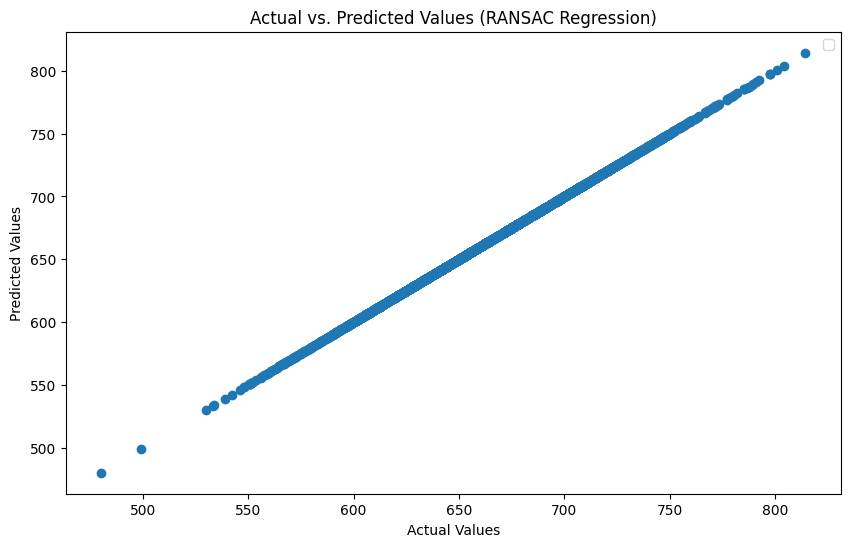

In [ ]:
import pandas as pd
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Initialize an imputer to fill missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE')
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit and transform the imputer on your data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize the RANSAC Regressor model
ransac = RANSACRegressor(base_estimator=None, min_samples=100, residual_threshold=2.0, random_state=42)

# Fit the model to the imputed training data
ransac.fit(X_train_imputed, y_train)

# Predict using the imputed test set
y_pred = ransac.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RANSAC Regression)')
plt.legend()
plt.show()

### **10. Quartile Regression**

Quantile Quantile 0.25:
                            QuantReg Regression Results                            
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   Pseudo R-squared:                1.000
Model:                            QuantReg   Bandwidth:                   3.293e-11
Method:                      Least Squares   Sparsity:                    5.078e-10
Date:                     Sat, 11 Nov 2023   No. Observations:                15972
Time:                             06:35:52   Df Residuals:                    15947
                                             Df Model:                           24
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        544.2000   2.05e-11   2.66e+13      0.000     544.200     544.200
x1             1.7000   9.41e-13   1.81e+12      0.000       1.700       1.700
x2         -5.765e-11    2.5e-12    -23.106      0.000   -6.25e-11   -5.

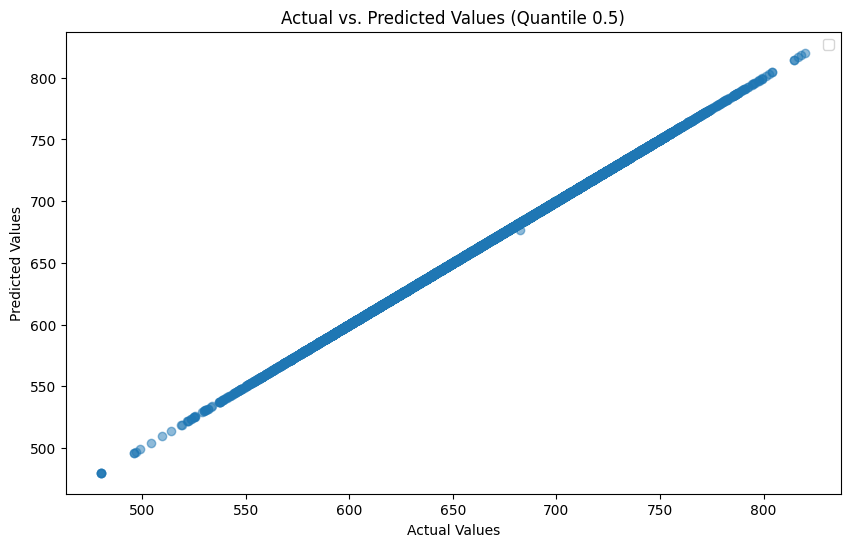

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'
features = df.columns.difference([target_column])

# Separate the target variable from the features
X = df[features]
y = df[target_column]

# Initialize an imputer to fill missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data
X_imputed = imputer.fit_transform(X)

# Add a constant term to the features for the intercept in the regression
X_imputed = sm.add_constant(X_imputed)

# Define the quantiles you want to estimate (e.g., 0.25, 0.50, and 0.75)
quantiles = [0.25, 0.50, 0.75]

# Perform quantile regression for each specified quantile
quantile_results = {}
for q in quantiles:
    model = sm.QuantReg(y, X_imputed).fit(q=q)
    quantile_results[f'Quantile {q}'] = model

# Print summaries of quantile regression models
for q, model in quantile_results.items():
    print(f"Quantile {q}:")
    print(model.summary())

# Visualize the quantile regression results (you can choose the quantile you're interested in)
quantile_to_plot = 0.50  # Adjust as needed
model_to_plot = quantile_results[f'Quantile {quantile_to_plot}']
y_pred = model_to_plot.predict(X_imputed)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (Quantile {quantile_to_plot})')
plt.legend()
plt.show()




### **11. GAM (Generalized Additive Model)**

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.


In [ ]:
import pandas as pd
from pygam import LinearGAM, s
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'
features = df.columns.difference([target_column])

# Separate the target variable from the features
X = df[features]
y = df[target_column]

# Initialize a SimpleImputer to handle missing values (replace 'NaN' with appropriate strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize the GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23))

# Split the data into training and testing sets (if needed)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Fit the model to your data
gam.fit(X_train, y_train)

# Print the summary of the GAM model
print(gam.summary())

# Predict using the fitted model
y_pred = gam.predict(X_test)

# You can use metrics like Mean Squared Error (MSE) or R-squared (R²) to evaluate the model's performance.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    182.5207
Link Function:                     IdentityLink Log Likelihood:                              -3020259.6034
Number of Samples:                        12777 AIC:                                          6040886.2483
                                                AICc:                                         6040891.6266
                                                GCV:                                                0.0021
                                                Scale:                                               0.002
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam

<ipython-input-35-6f6af44fea44>:29: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




## **12. Huber Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Mean Squared Error (MSE): 6.09060357706654
R-squared (R²): 0.9969342183968587


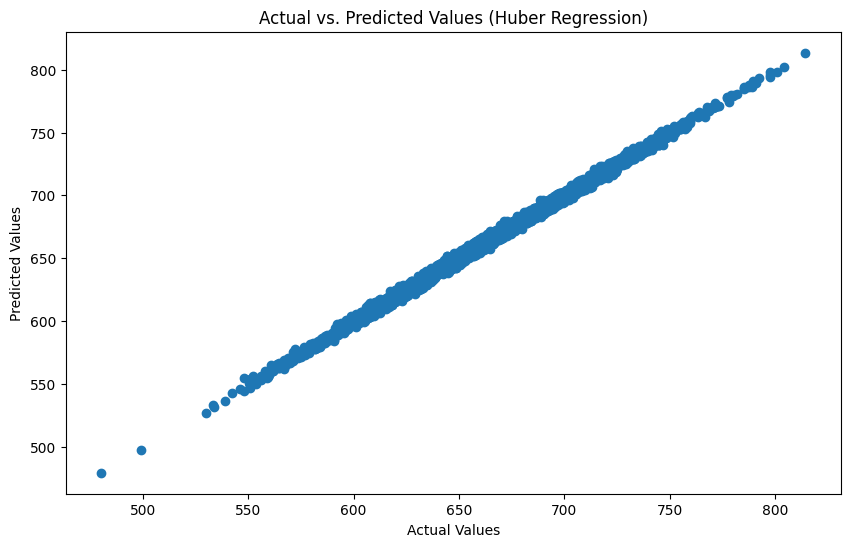

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'
features = df.columns.difference([target_column])

# Separate the target variable from the features
X = df[features]
y = df[target_column]

# Impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Huber Regressor model
model = HuberRegressor(epsilon=1.35)  # Adjust epsilon as needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Huber Regression)')
plt.show()


### **13. RBF Kernel Regression**

Mean Squared Error (MSE): 9985.810663937926
R-squared (R²): -4.0264828827848875


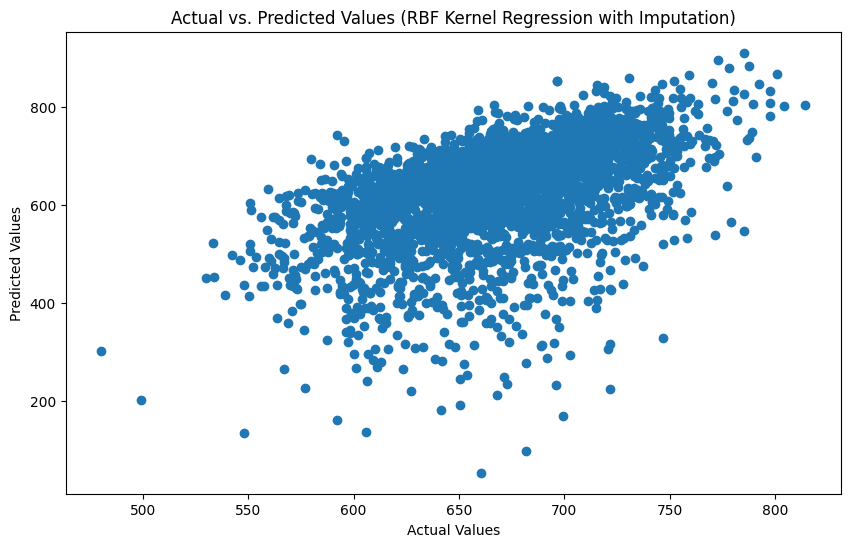

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.impute import SimpleImputer  # Import the imputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'
features = df.columns.difference([target_column])

# Separate the target variable from the features
X = df[features]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values (replace 'mean' with 'median' or 'most_frequent' if desired)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the KernelRidge model with RBF kernel
model = KernelRidge(kernel='rbf', gamma=0.1)  # Adjust gamma as needed

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RBF Kernel Regression with Imputation)')
plt.show()


### **14. SGD Regression (Stochastic Gradient Descent)**

Mean Squared Error (MSE): 0.00017013420431995685
R-squared (R²): 0.9999999143608171


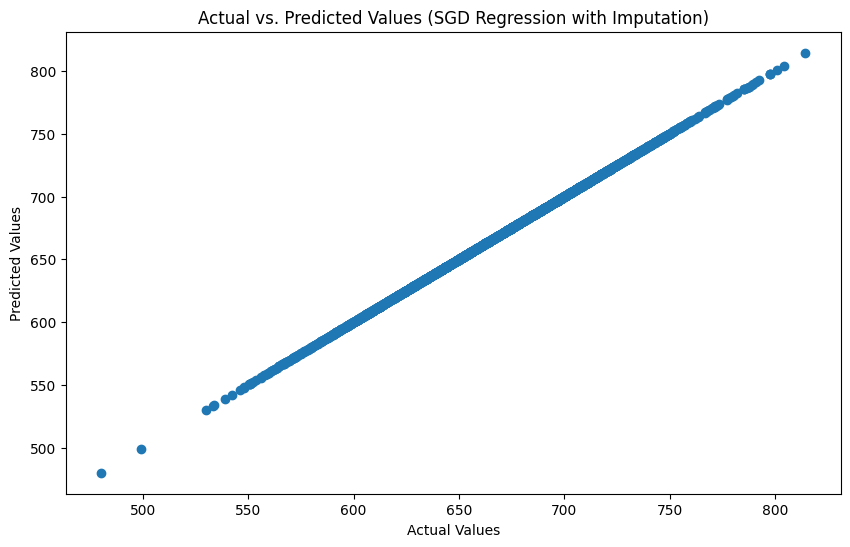

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'
features = df.columns.difference([target_column])

# Separate the target variable from the features
X = df[features]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values (replace 'mean' with 'median' or 'most_frequent' if desired)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the SGD Regressor model
model = SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=1000, random_state=42)  # Adjust hyperparameters as needed

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SGD Regression with Imputation)')
plt.show()


### **PCA on the above 14 Regression Models**

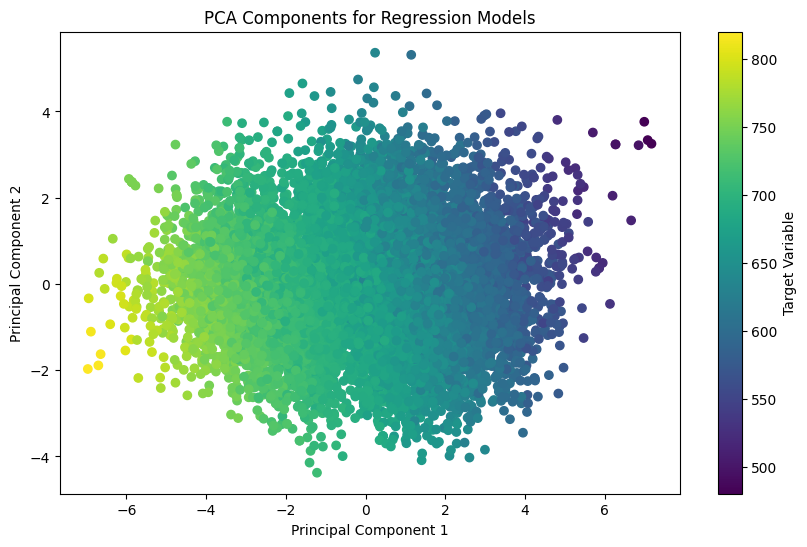

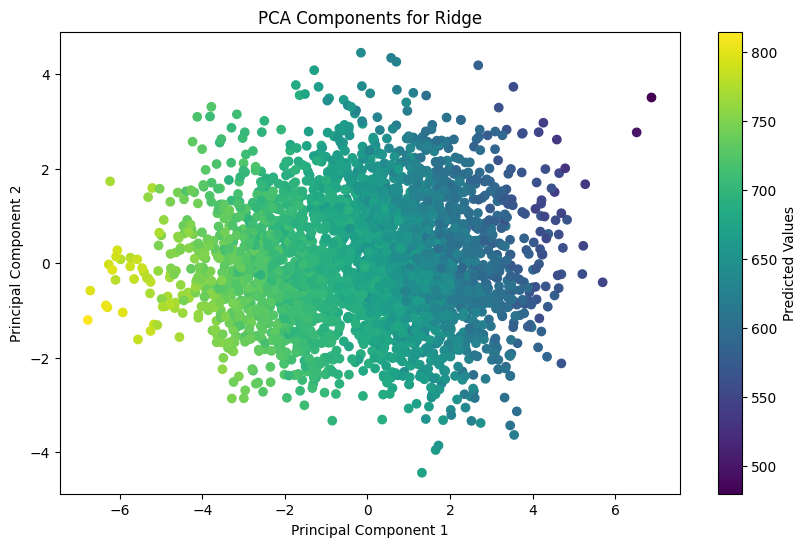

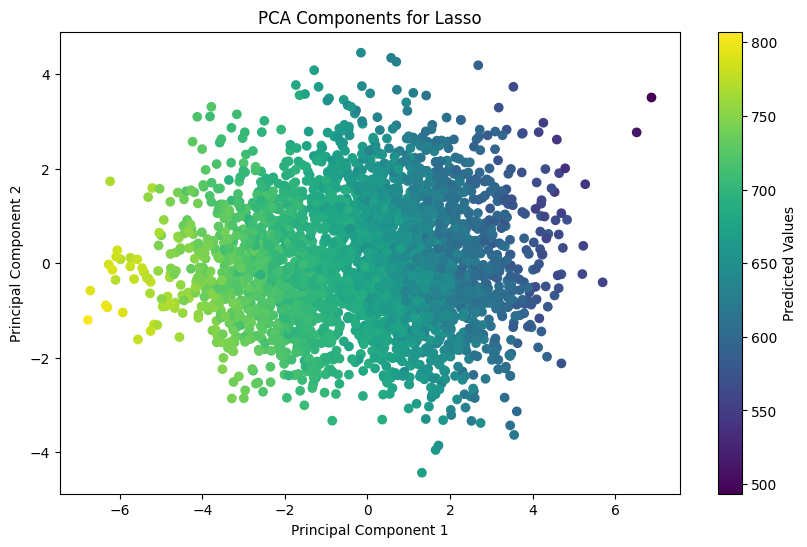

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



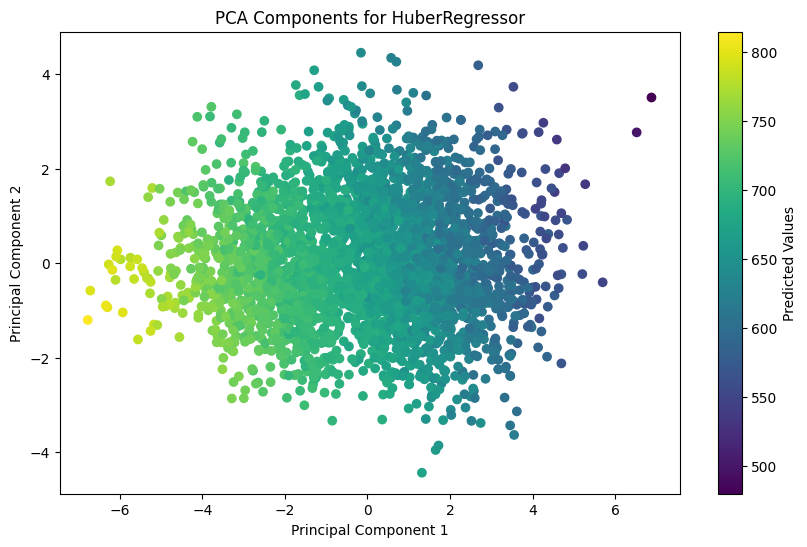

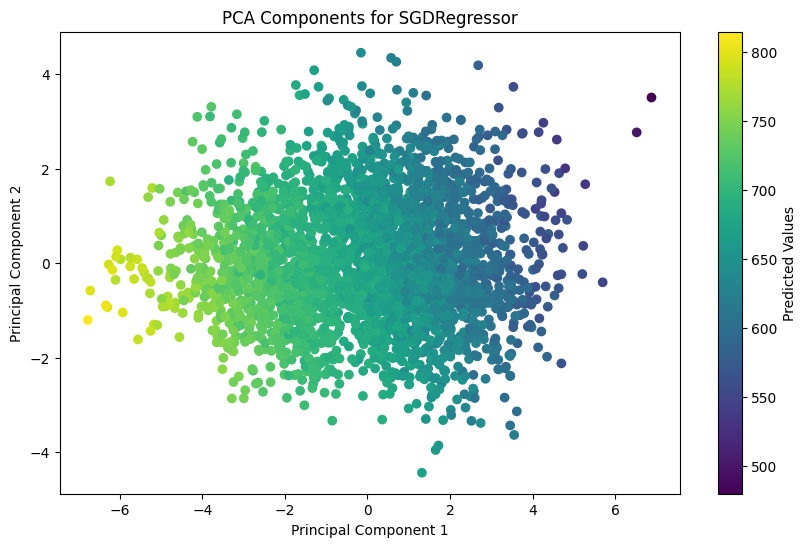

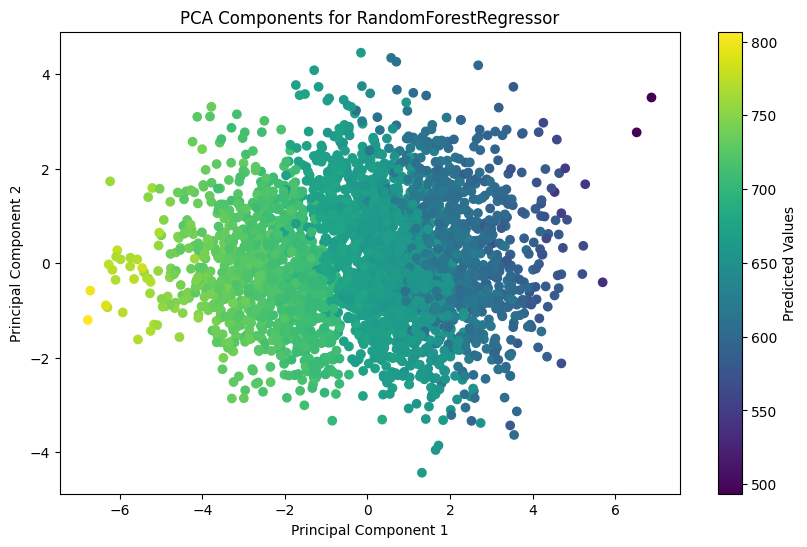

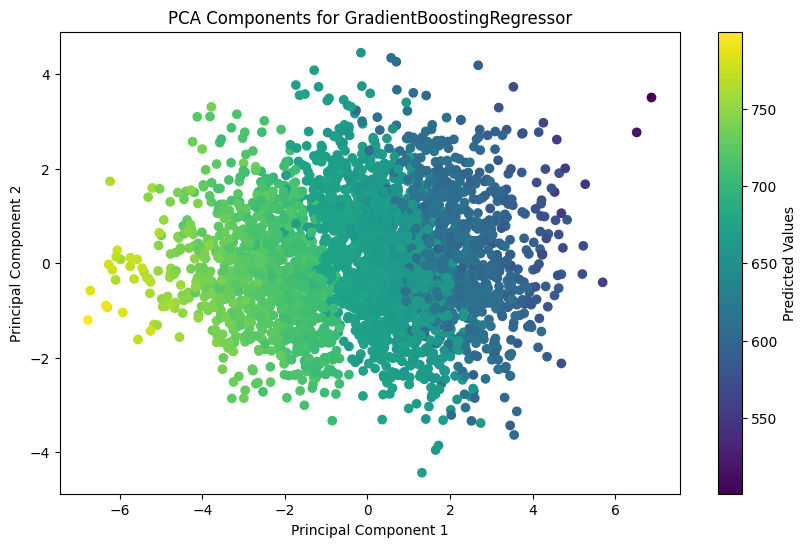

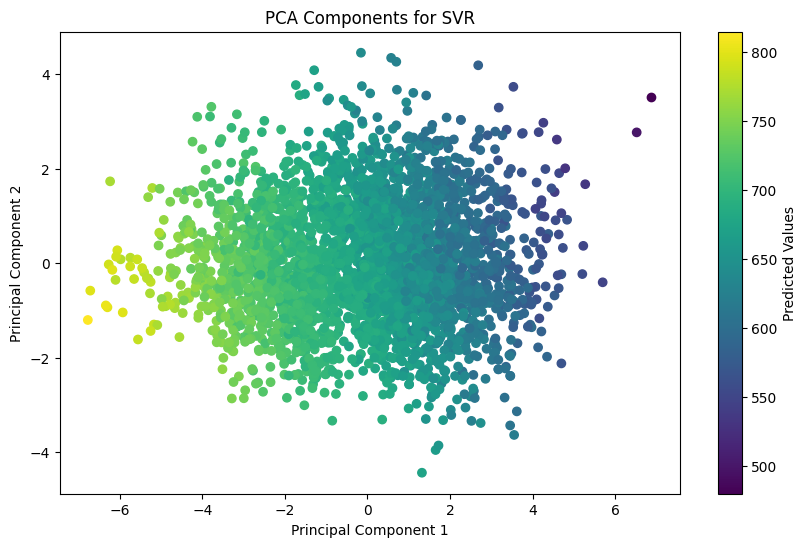

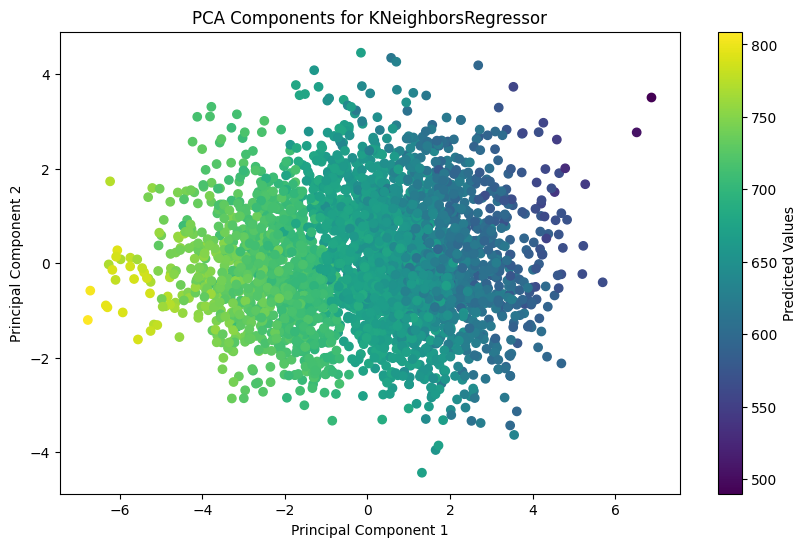

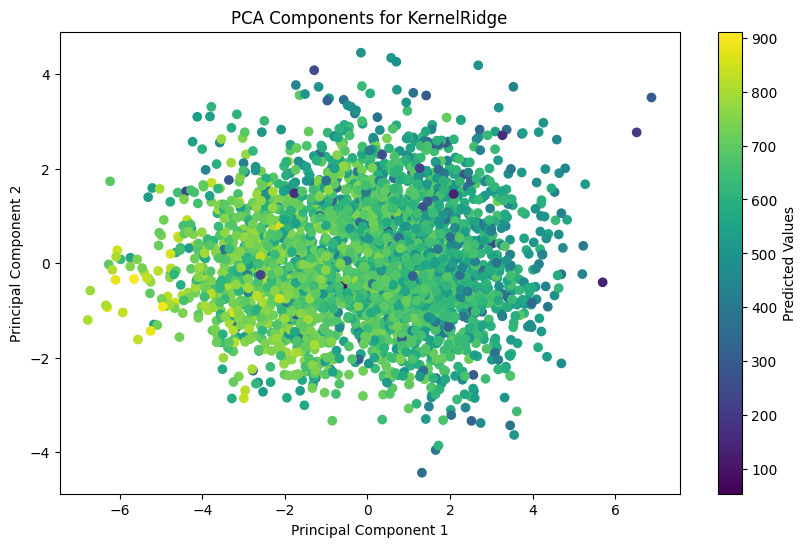

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.



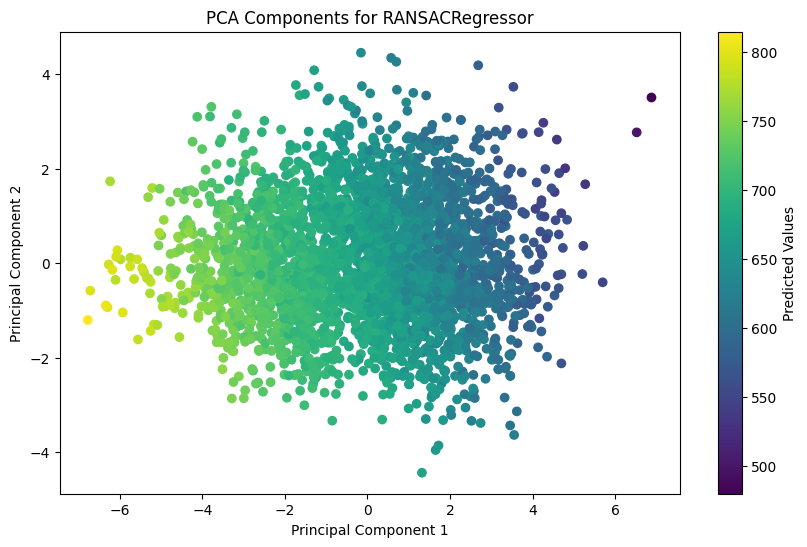

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



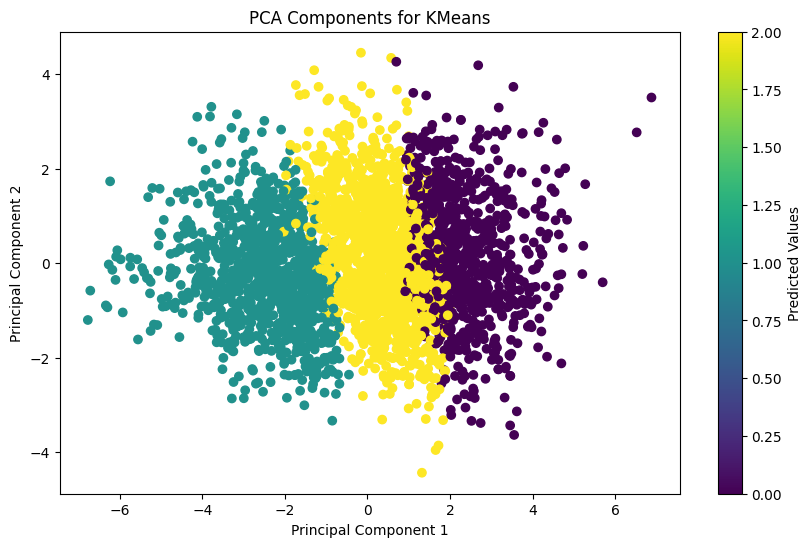

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (Ridge, Lasso, HuberRegressor, SGDRegressor)
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RANSACRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'
features = df.columns.difference([target_column])

# Separate the target variable from the features
X = df[features]
y = df[target_column]

# Initialize the imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform PCA on training data
X_train_pca = pca.fit_transform(X_train)

# Visualize PCA components for the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Components for Regression Models')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Variable')
plt.show()

# Define regression models
regression_models = [
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    HuberRegressor(epsilon=1.35),
    SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=1000, random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    KernelRidge(kernel='rbf', gamma=0.1),
    RANSACRegressor(base_estimator=None, min_samples=100, residual_threshold=2.0, random_state=42),
    KMeans(n_clusters=3, random_state=42),
]

# Plot PCA components for each regression model
for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Transform test data using PCA
    X_test_pca = pca.transform(X_test)

    # Plot the predicted vs. actual values using PCA components
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
    plt.title(f'PCA Components for {model.__class__.__name__}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Predicted Values')
    plt.show()


### **Stacking Ensembeling**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names

/usr/local/lib/pyt

Stacking Regressor - Mean Squared Error (MSE): 0.012751596244131613
Stacking Regressor - R-squared (R²): 0.9999935813243004


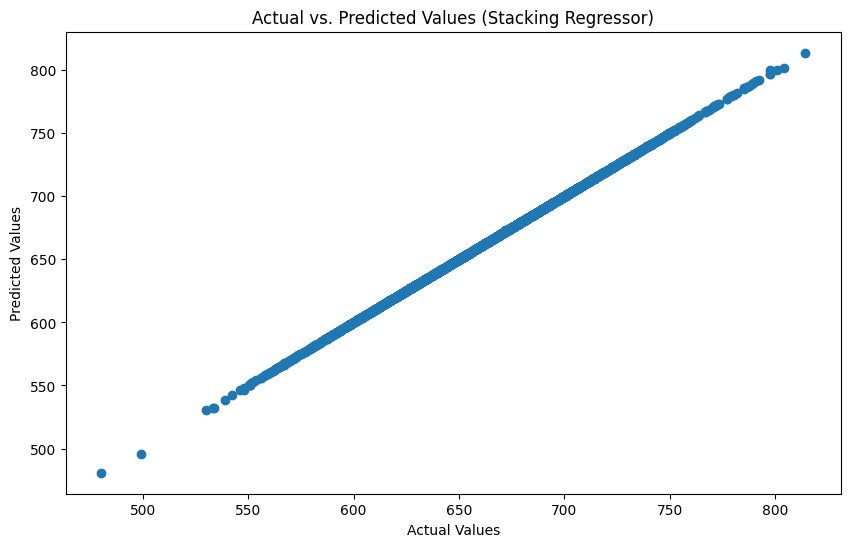

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, HuberRegressor, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RANSACRegressor
from sklearn.cluster import KMeans
from mlxtend.regressor import StackingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your target variable (e.g., 'WORK_LIFE_BALANCE_SCORE') and features
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the target variable from the features
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values (replace 'mean' with 'median' or 'most_frequent' if desired)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the base models
models = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    Ridge(),
    Lasso(),
    HuberRegressor(),
    SGDRegressor(),
    SVR(),
    KNeighborsRegressor(),
    KernelRidge(),
    RANSACRegressor(),
    KMeans()
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    regressors=[make_pipeline(imputer, scaler, model) for model in models],
    meta_regressor=RandomForestRegressor(n_estimators=100, random_state=42)
)

# Fill NaN values with the mean
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))


# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Predict using the test set
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluate the stacking regressor using Mean Squared Error (MSE) and R-squared (R²)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print("Stacking Regressor - Mean Squared Error (MSE):", mse_stacking)
print("Stacking Regressor - R-squared (R²):", r2_stacking)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacking)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Stacking Regressor)')
plt.show()
